In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
import protfasta
from sparrow import Protein
from afrc import wlc, AnalyticalFRC
from scipy.signal import savgol_filter

# used to compute Rh from Rg (not used in this notebook)
# but retained here for clarity
# from rh_code import compute_rg_re_rh


### Load experimental data 
Take average of Rh from the two 

In [2]:
name2seq = protfasta.read_fasta('data/m_linker_m/m_linker_m_sequences.fasta')

In [3]:
name2len = {name:len(name2seq[name]) for name in name2seq}

In [4]:
name2len = {k: v for k, v in sorted(name2len.items(), key=lambda item: item[1])}

In [5]:
with open('data/sec/sec_data_raw.csv') as fh:
    content = fh.readlines()
    
name2info = {}
for line in content:
    sl = line.strip().split(',')
    name2info[sl[0]] = sl[1:]

name2rh = {}
name2rh_all = {}
for i in name2info:
    name2rh[i] = np.mean([float(i) for i in name2info[i][-4:-2]])
    name2rh_all[i] = [float(i) for i in name2info[i][-4:-2:]]
        

In [6]:
rh_75 = {}
rh_200 = {}

for i in name2info:
    entry = name2info[i]
    rh_75[i] = [float(entry[6]),float(entry[8])]
    rh_200[i] = [float(entry[7]),float(entry[9])]
    


In [7]:
rh_75

{'HC.HAdV5': [30.0, 1.5],
 'HG.HAdV52_Graft': [25.8, 1.5],
 'HF.HAdV40_Graft': [28.1, 1.6],
 'BtB.BtAdV2_Graft': [28.4, 1.6],
 'OA.BAdV2_Graft': [24.4, 1.7]}

In [9]:
name2color = {'HC.HAdV5': '#010101',
 'HG.HAdV52_Graft':'#010101' ,
 'HF.HAdV40_Graft': '#010101',
 'BtB.BtAdV2_Graft': '#7A43CB' ,
 'OA.BAdV2_Graft': '#007E01'}


In [10]:

name2rh_sim_mean = {}
name2rh_sim_err = {}
name2rh_sim_all = {}



for name in name2rh:

    tmp = np.loadtxt(f'data/m_linker_m/{name}/all_rh.csv')
    
    name2rh_sim_all[name] = tmp
    name2rh_sim_mean[name] = np.mean(tmp)
    name2rh_sim_err[name] = np.std(tmp)/np.sqrt(len(tmp))


In [11]:
name2len

{'OA.BAdV2_Graft': 70,
 'HG.HAdV52_Graft': 84,
 'HF.HAdV40_Graft': 91,
 'BtB.BtAdV2_Graft': 100,
 'HC.HAdV5': 114}

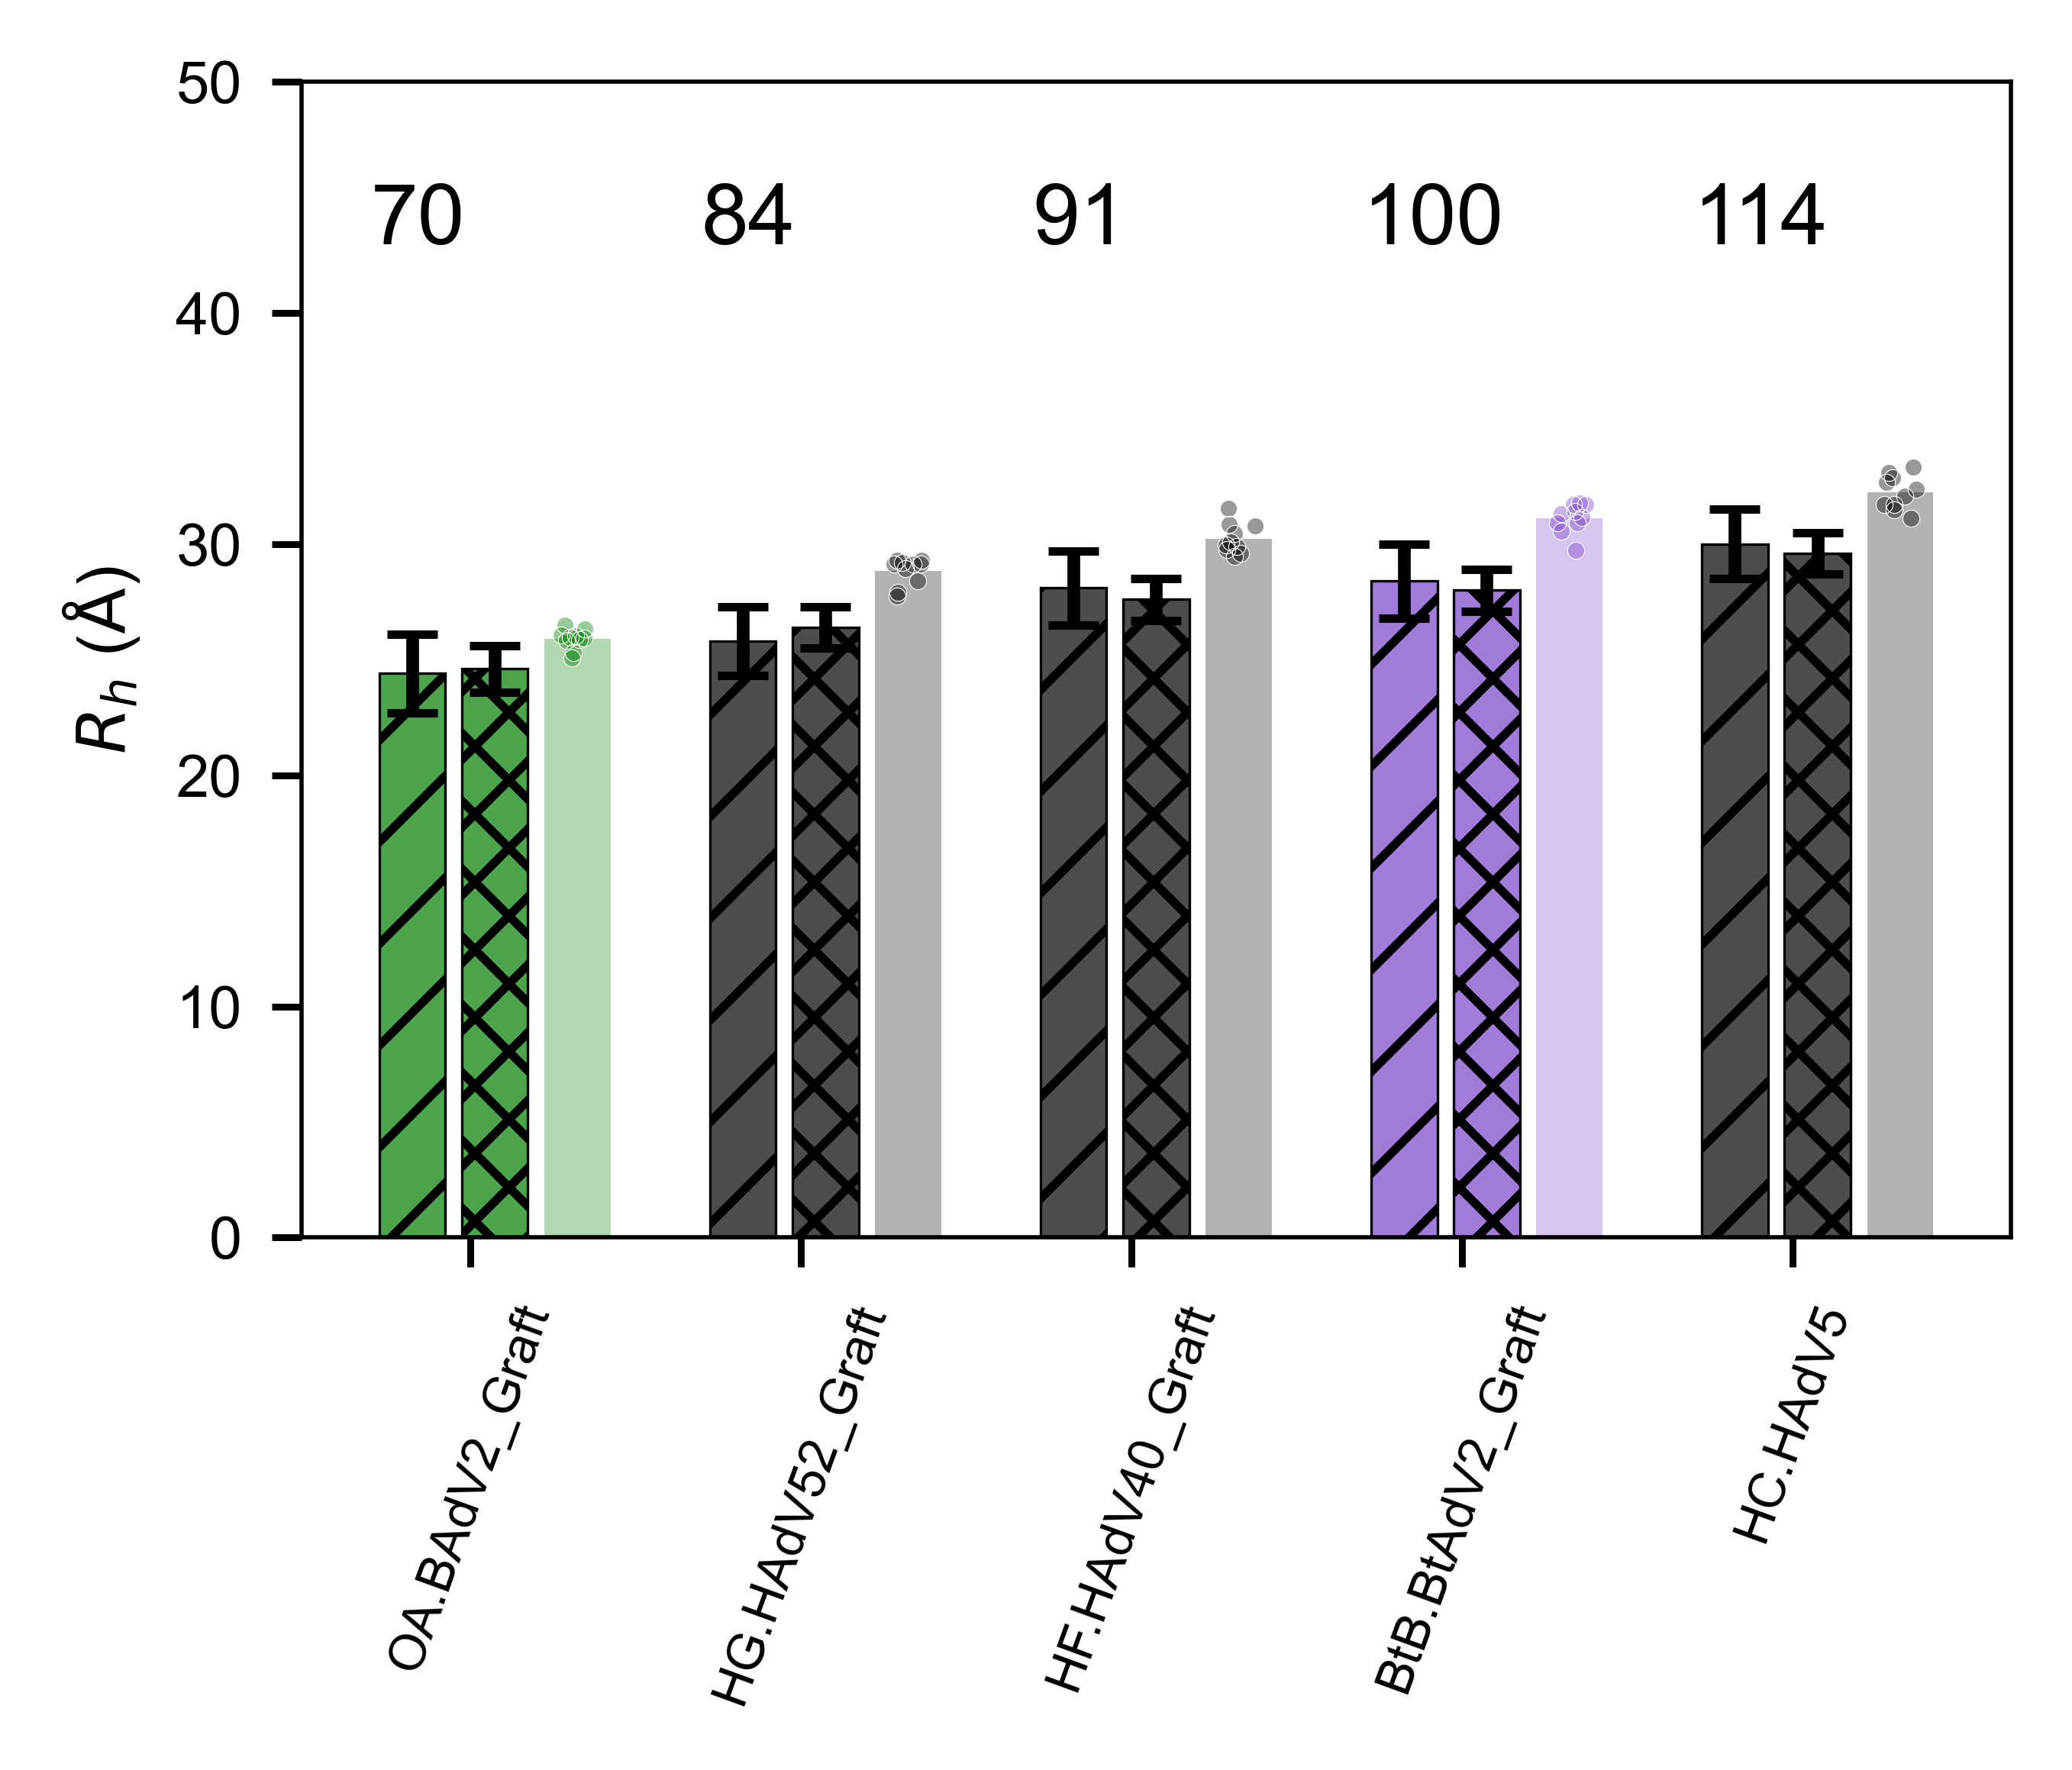

In [12]:
figure(num=None, figsize=(3.5, 3.), dpi=400, facecolor='w', edgecolor='k')
ax = plt.gca()

idx = 1
jitter_factor = 0.2



for i in name2len:    
    
    
    position = idx - 0.35
    plt.bar(position, rh_75[i][0], color=name2color[i], alpha=0.7, width=0.4, hatch='//')
    plt.bar(position, rh_75[i][0],  yerr=rh_75[i][1], color='None', capsize=3, width=0.4, hatch='//', edgecolor='k', linewidth=0.3)
    
    

    position = idx + 0.15
    plt.bar(position, rh_200[i][0], color=name2color[i], alpha=0.7, width=0.4, hatch='xxx')
    plt.bar(position, rh_200[i][0], yerr=rh_200[i][1], color='None', capsize=3, width=0.4, hatch='xxx', edgecolor='k', linewidth=0.3)


    
    position = idx + 0.65
    plt.bar(position, name2rh_sim_mean[i],color=name2color[i], alpha=0.3, width=0.4)
    
    
    idx = idx + 2

idx = 1 
 
for i in name2len:
    
    
    position = idx + 0.65
    
    if i != 'HF.HAdV40-2X_Graft':
        sim_rh = name2rh_sim_all[i]
        x_offset = jitter_factor*np.random.random(len(sim_rh))-(jitter_factor/2)
        x_pos = position + x_offset
        plt.plot(x_pos, sim_rh,'o', color=name2color[i], ms=2, alpha=0.4,mew=0)
        plt.plot(x_pos, sim_rh,'o', color='None', ms=2, alpha=1,mew=0.1, mec='w')
        
    idx = idx +2
    
idx = 1    
for i in name2len:
    plt.text(idx-0.6, 43, name2len[i])
    
    idx = idx + 2
    
    
plt.ylim([0,50]) 

plt.ylabel(r'$R_h$ ($\rm\AA$)',fontsize=8)
plt.yticks(fontsize=7)
plt.xticks(np.arange(1,len(name2len)*2,2), list(name2len.keys()), rotation=70, fontsize=6)
print('')
plt.tight_layout()    
plt.savefig('figures/m_linker_m/rh_sim_vs_exp.pdf')
plt.savefig('figures/m_linker_m/rh_sim_vs_exp.jpeg')
